In [135]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [136]:
sample_info = pd.read_csv('../data/sample_info.csv')
radiosensitivity = pd.read_csv('../data/radiosensitivity.csv')
expression = pd.read_csv('../data/expressionData.csv')
sample_info


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,b_cell,NaN,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NSCLC_adenocarcinoma,NaN,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN
3,ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_0993,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-rTUVZQ,NaN,Melanoma,C3224,NaN
4,ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_WS59,NaN,...,NaN,NaN,NaN,immortalized,NaN,PT-qWYYgr,NaN,NaN,NaN,No information is available about this cell li...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,ACH-002393,CRO-AP3,CROAP3,CROAP3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,Sanger,CVCL_1810,NaN,...,b_cell_primary_effusion,NaN,NaN,NaN,NaN,PT-TC0lZM,NaN,Primary effusion lymphoma,C6915,NaN
1836,ACH-002394,GEO,GEO,GEO_LARGE_INTESTINE,NaN,NaN,NaN,Sanger,CVCL_0271,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-Fa1q9q,NaN,Colon carcinoma,C4910,NaN
1837,ACH-002395,HuH-6 Clone 5,HUH6CLONE5,HUH6CLONE5_LIVER,NaN,NaN,Male,Sanger,CVCL_1296,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-TtIXsL,ACH-000671,Hepatoblastoma,C3728,NaN
1838,ACH-002396,Sarc9371,SARC9371,SARC9371_BONE,NaN,NaN,NaN,Sanger,CVCL_5G89,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-715FdC,NaN,Osteosarcoma,C9145,NaN


In [138]:
data = pd.merge(expression, radiosensitivity, on='cell_line_name', how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Columns: 19227 entries, cell_line_name to AUC
dtypes: float64(19226), object(1)
memory usage: 67.6+ MB


In [139]:

data = data.drop(columns=['cell_line_name'])
data = data.drop(columns=['R2', 'AUC', 'alpha', 'beta'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Columns: 19222 entries, TSPAN6 (7105) to SF2
dtypes: float64(19222)
memory usage: 67.6 MB


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Columns: 19222 entries, TSPAN6 (7105) to SF2
dtypes: float64(19222)
memory usage: 67.6 MB


In [141]:
y = data['SF2']
X = data.drop(columns=['SF2'])

In [142]:
X

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
0,5.847496,5.251340,6.016585,2.454176,4.070389,0.042644,0.042644,5.404971,3.802193,5.289834,...,0.748461,0.124328,0.356144,1.761285,0.378512,0.000000,0.014355,0.000000,0.226509,0.000000
1,4.100978,0.000000,6.093180,2.548437,3.764474,0.275007,7.168321,6.881175,3.868884,4.542877,...,0.000000,0.863938,0.000000,2.750607,1.389567,0.111031,0.000000,0.111031,0.111031,0.389567
2,2.861955,0.000000,6.276683,1.819668,3.813525,0.176323,1.555816,6.204180,4.249445,4.078097,...,2.204767,0.000000,0.545968,2.498251,0.250962,0.014355,0.000000,0.014355,0.014355,0.000000
3,4.232661,1.176323,5.953032,2.632268,3.689299,0.000000,0.056584,0.263034,5.366322,5.871597,...,1.214125,2.839960,0.286881,2.211012,0.000000,0.000000,0.000000,0.000000,0.000000,0.475085
4,3.726831,0.000000,6.779260,1.475085,4.128458,0.014355,1.992768,6.685660,6.011898,4.761285,...,2.017922,1.378512,0.000000,2.555816,0.000000,0.014355,0.084064,0.000000,0.014355,0.111031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,5.723559,0.263034,6.433627,2.916477,3.372952,0.000000,0.070389,5.743623,5.659925,3.121015,...,1.176323,0.275007,0.367371,1.367371,0.263034,0.000000,0.000000,0.000000,0.000000,0.000000
457,4.288359,0.000000,6.515227,2.163499,4.028569,0.226509,6.631977,7.699885,4.050502,4.051372,...,0.678072,0.344828,0.411426,1.970854,0.298658,0.000000,0.014355,0.000000,0.000000,0.028569
458,4.177918,0.000000,6.028348,2.073820,3.899176,0.042644,0.238787,6.879338,6.059831,3.856986,...,0.464668,0.000000,1.157044,2.589763,0.000000,0.000000,0.000000,0.150560,0.000000,0.000000
459,4.276497,0.000000,7.454669,3.246408,3.715893,1.070389,0.344828,6.489768,5.508746,4.440952,...,0.298658,0.000000,0.948601,1.650765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [143]:
# Correlation testing with Filter Method


list = []

count = 0
for var in X.columns:
    if X[var].nunique() > 1:
        spearmanr_corr, spearmanr_pvalue = sts.spearmanr(X[var], y)
        if  abs(spearmanr_corr) > (0.15):
            if (spearmanr_pvalue) < (0.05):
                count += 1
                list.append(var)


count2 = 0
for var2 in X.columns:
    if  X[var2].nunique() > 1:
        pearsonr_corr, pearsonr_pvalue = sts.pearsonr(X[var2], y)
        if abs(pearsonr_corr) > (0.15):
            if (pearsonr_pvalue) < (0.05):
                count2 += 1
                if var2 not in list:
                    list.append(var2)
print(len(list), "variables according to Pearson's r and Spearman Rank correlation were correlated to the Sensitivity")



1243 variables according to Pearson's r and Spearman Rank correlation were correlated to the Sensitivity


In [144]:
X = pd.DataFrame(X[list])
X

,ENPP4 (22875),DBNDD1 (79007),KDM1A (23028),DHX33 (56919),COPZ2 (51226),CROT (54677),ZNF195 (7748),TMEM98 (26022),NOS2 (4843),LUC7L (55692),...,PDCD6 (10016),GPR162 (27239),ATXN7L3B (552889),UTP14C (9724),MEX3A (92312),FXYD6-FXYD2 (100533181),TRIM34 (53840),GFY (100507003),XKR5 (389610),MARCKS (4082)
0,0.687061,3.360364,6.495056,4.987776,3.823749,4.090007,4.793376,7.221780,0.485427,6.709015,...,6.831244,3.887525,4.336997,2.361768,5.463361,0.000000,1.195348,0.000000,0.622930,4.929791
1,1.137504,2.416840,6.308521,3.481557,6.992429,5.102658,2.713696,1.726831,0.000000,6.439623,...,6.903400,2.060047,4.662205,0.505891,2.992768,0.000000,2.632268,0.000000,1.400538,6.917432
2,0.014355,2.599318,5.672142,4.061776,5.249445,3.392317,3.157044,6.244697,0.367371,4.635174,...,6.906289,0.516015,3.291309,0.356144,1.000000,0.000000,1.985500,0.028569,0.014355,4.972233
3,0.014355,2.914565,6.626147,4.838952,1.989139,3.023255,5.581351,6.880686,0.748461,6.751544,...,6.349967,4.358256,6.109152,2.718088,6.373300,0.594549,0.000000,0.000000,2.427606,6.851999
4,1.748461,3.945795,5.942515,3.990955,5.075533,2.893362,4.037382,0.485427,0.000000,4.980939,...,6.466627,3.517276,4.034744,1.014355,3.397803,0.000000,1.389567,0.000000,0.000000,5.715893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2.459432,2.056584,4.728465,2.757023,1.646163,2.773996,3.760221,2.737687,2.094236,4.571677,...,6.913608,0.028569,3.880686,1.550901,0.871844,0.000000,1.014355,0.097611,0.000000,3.499527
457,0.014355,1.422233,5.619120,3.089159,5.744161,1.937344,3.229588,0.773996,0.014355,4.397803,...,6.517276,1.344828,3.722466,0.226509,1.604071,0.000000,3.305971,0.028569,1.673556,6.162492
458,3.282440,5.781622,6.087675,4.372256,0.214125,0.014355,4.577127,0.344828,0.000000,5.252098,...,6.755288,0.000000,3.152183,0.000000,0.992768,0.000000,0.831877,0.097611,0.000000,3.737687
459,3.077243,1.464668,5.915999,3.555816,0.356144,3.364572,5.158660,5.630231,0.000000,6.081936,...,7.690627,0.226509,4.191405,3.598127,2.857981,0.000000,3.799087,0.000000,0.028569,4.605257


In [145]:
summary = pd.DataFrame(index=['Linear_Regression', 'Lasso_Regression', 'Ridge_Regression'], columns=['Average_Test_R2', 'Test_R2_STD', 'Average_Test_RMSE', 'Test_RMSE_STD', 'Average_Train_R2', 'Train_R2_STD', 'Average_Train_RMSE', 'Train_RMSE_STD'])
summary

,Average_Test_R2,Test_R2_STD,Average_Test_RMSE,Test_RMSE_STD,Average_Train_R2,Train_R2_STD,Average_Train_RMSE,Train_RMSE_STD
Linear_Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lasso_Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ridge_Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Evaluation function for Linear Regression (PCA as additional Feature Selection step)
def evaluation(model, X, y):
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return rmse, r2

cv = KFold(n_splits=5, shuffle=True, random_state=0)
fold = 1

train_metrics = {'rmse': [], 'r2': []}
test_metrics = {'rmse': [], 'r2': []}
best_params = {'pca__n_components': []}



param_grid = {'pca__n_components': np.linspace(35, 42, 16, dtype=int)}

for train_index, test_index in cv.split(X, y):
    print(f"Working on fold {fold}")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(random_state=0)),
                     ('linear', LinearRegression())])
    
    search = GridSearchCV(pipe, param_grid, n_jobs=4)
    clf = search.fit(X_train, y_train)

    best_params['pca__n_components'].append(search.best_params_['pca__n_components'])
    print(best_params)

    train_eval = evaluation(clf, X_train, y_train)
    train_metrics['rmse'].append(train_eval[0])
    train_metrics['r2'].append(train_eval[1])
    
    test_eval = evaluation(clf, X_test, y_test)
    test_metrics['rmse'].append(test_eval[0])
    test_metrics['r2'].append(test_eval[1])

    print(f"Train RMSE: {train_eval[0]:.3f}, R2: {train_eval[1]:.3f}")
    print(f"Test RMSE: {test_eval[0]:.3f}, R2: {test_eval[1]:.3f}")

    fold += 1



# Print average metrics
print("Average Train RMSE: {:.3f}".format(np.mean(train_metrics['rmse'])))
print("Average Train R2: {:.3f}".format(np.mean(train_metrics['r2'])))
print("Average Test RMSE: {:.3f}".format(np.mean(test_metrics['rmse'])))
print("Average Test R2: {:.3f}".format(np.mean(test_metrics['r2'])))

summary.loc['Linear_Regression']['Average_Train_R2'] = np.mean(train_metrics['r2'])
summary.loc['Linear_Regression']['Average_Test_R2'] = np.mean(test_metrics['r2'])
summary.loc['Linear_Regression']['Average_Train_RMSE'] = np.mean(train_metrics['rmse'])
summary.loc['Linear_Regression']['Average_Test_RMSE'] = np.mean(test_metrics['rmse'])

summary.loc['Linear_Regression']['Train_R2_STD'] = np.std(train_metrics['r2'])
summary.loc['Linear_Regression']['Test_R2_STD'] = np.std(test_metrics['r2'])
summary.loc['Linear_Regression']['Train_RMSE_STD'] = np.std(train_metrics['rmse'])
summary.loc['Linear_Regression']['Test_RMSE_STD'] = np.std(test_metrics['rmse'])

Working on fold 1
{'pca__n_components': [40]}
Train RMSE: 0.165, R2: 0.363
Test RMSE: 0.179, R2: 0.160
Working on fold 2
{'pca__n_components': [40, 41]}
Train RMSE: 0.165, R2: 0.363
Test RMSE: 0.199, R2: -0.001
Working on fold 3
{'pca__n_components': [40, 41, 40]}
Train RMSE: 0.167, R2: 0.325
Test RMSE: 0.180, R2: 0.261
Working on fold 4
{'pca__n_components': [40, 41, 40, 35]}
Train RMSE: 0.173, R2: 0.274
Test RMSE: 0.177, R2: 0.308
Working on fold 5
{'pca__n_components': [40, 41, 40, 35, 40]}
Train RMSE: 0.167, R2: 0.329
Test RMSE: 0.179, R2: 0.253
Average Train RMSE: 0.167
Average Train R2: 0.331
Average Test RMSE: 0.183
Average Test R2: 0.196


In [147]:
"""
1. Performance

'pca__n_components': np.linspace(5, 100, 10, dtype=int)

Working on fold 1
{'pca__n_components': [26]}
Train RMSE: 0.171, R2: 0.318
Test RMSE: 0.175, R2: 0.202
Working on fold 2
{'pca__n_components': [26, 26]}
Train RMSE: 0.168, R2: 0.340
Test RMSE: 0.199, R2: -0.009
Working on fold 3
{'pca__n_components': [26, 26, 47]}
Train RMSE: 0.162, R2: 0.370
Test RMSE: 0.184, R2: 0.222
Working on fold 4
{'pca__n_components': [26, 26, 47, 26]}
Train RMSE: 0.172, R2: 0.283
Test RMSE: 0.180, R2: 0.285
Working on fold 5
{'pca__n_components': [26, 26, 47, 26, 26]}
Train RMSE: 0.169, R2: 0.315
Test RMSE: 0.173, R2: 0.304
Average Train RMSE: 0.168
Average Train R2: 0.325
Average Test RMSE: 0.182
Average Test R2: 0.201


2. Performance

'pca__n_components': np.linspace(20, 50, 16, dtype=int)

Working on fold 1
{'pca__n_components': [32]}
Train RMSE: 0.169, R2: 0.330
Test RMSE: 0.173, R2: 0.219
Working on fold 2
{'pca__n_components': [32, 28]}
Train RMSE: 0.166, R2: 0.350
Test RMSE: 0.198, R2: 0.000
Working on fold 3
{'pca__n_components': [32, 28, 40]}
Train RMSE: 0.164, R2: 0.351
Test RMSE: 0.186, R2: 0.211
Working on fold 4
{'pca__n_components': [32, 28, 40, 30]}
Train RMSE: 0.170, R2: 0.296
Test RMSE: 0.178, R2: 0.303
Working on fold 5
{'pca__n_components': [32, 28, 40, 30, 28]}
Train RMSE: 0.169, R2: 0.319
Test RMSE: 0.174, R2: 0.296
Average Train RMSE: 0.168
Average Train R2: 0.329
Average Test RMSE: 0.182
Average Test R2: 0.206


3. Performance

'pca__n_components': np.linspace(30, 50, 10, dtype=int)

Working on fold 1
{'pca__n_components': [32]}
Train RMSE: 0.169, R2: 0.330
Test RMSE: 0.173, R2: 0.219
Working on fold 2
{'pca__n_components': [32, 30]}
Train RMSE: 0.166, R2: 0.350
Test RMSE: 0.199, R2: -0.003
Working on fold 3
{'pca__n_components': [32, 30, 41]}
Train RMSE: 0.164, R2: 0.351
Test RMSE: 0.185, R2: 0.212
Working on fold 4
{'pca__n_components': [32, 30, 41, 30]}
Train RMSE: 0.170, R2: 0.296
Test RMSE: 0.178, R2: 0.303
Working on fold 5
{'pca__n_components': [32, 30, 41, 30, 32]}
Train RMSE: 0.168, R2: 0.327
Test RMSE: 0.173, R2: 0.303
Average Train RMSE: 0.168
Average Train R2: 0.331
Average Test RMSE: 0.182
Average Test R2: 0.207


4. Performance

'pca__n_components': np.linspace(35, 50, 10, dtype=int)

Working on fold 1
{'pca__n_components': [38]}
Train RMSE: 0.168, R2: 0.339
Test RMSE: 0.171, R2: 0.238
Working on fold 2
{'pca__n_components': [38, 38]}
Train RMSE: 0.164, R2: 0.366
Test RMSE: 0.195, R2: 0.032
Working on fold 3
{'pca__n_components': [38, 38, 41]}
Train RMSE: 0.164, R2: 0.351
Test RMSE: 0.185, R2: 0.212
Working on fold 4
{'pca__n_components': [38, 38, 41, 35]}
Train RMSE: 0.168, R2: 0.315
Test RMSE: 0.180, R2: 0.282
Working on fold 5
{'pca__n_components': [38, 38, 41, 35, 35]}
Train RMSE: 0.167, R2: 0.332
Test RMSE: 0.174, R2: 0.291
Average Train RMSE: 0.166
Average Train R2: 0.341
Average Test RMSE: 0.181
Average Test R2: 0.211


5. Performance (Best)

'pca__n_components': np.linspace(35, 50, 16, dtype=int)

Working on fold 1
{'pca__n_components': [38]}
Train RMSE: 0.168, R2: 0.339
Test RMSE: 0.171, R2: 0.238
Working on fold 2
{'pca__n_components': [38, 39]}
Train RMSE: 0.164, R2: 0.367
Test RMSE: 0.195, R2: 0.039
Working on fold 3
{'pca__n_components': [38, 39, 41]}
Train RMSE: 0.164, R2: 0.351
Test RMSE: 0.185, R2: 0.212
Working on fold 4
{'pca__n_components': [38, 39, 41, 35]}
Train RMSE: 0.168, R2: 0.315
Test RMSE: 0.180, R2: 0.282
Working on fold 5
{'pca__n_components': [38, 39, 41, 35, 35]}
Train RMSE: 0.167, R2: 0.332
Test RMSE: 0.174, R2: 0.291
Average Train RMSE: 0.166
Average Train R2: 0.341
Average Test RMSE: 0.181
Average Test R2: 0.212


6. Performance (Best)

'pca__n_components': np.linspace(35, 42, 16, dtype=int)

Working on fold 1
{'pca__n_components': [38]}
Train RMSE: 0.168, R2: 0.339
Test RMSE: 0.171, R2: 0.238
Working on fold 2
{'pca__n_components': [38, 39]}
Train RMSE: 0.164, R2: 0.367
Test RMSE: 0.195, R2: 0.039
Working on fold 3
{'pca__n_components': [38, 39, 41]}
Train RMSE: 0.164, R2: 0.351
Test RMSE: 0.185, R2: 0.212
Working on fold 4
{'pca__n_components': [38, 39, 41, 35]}
Train RMSE: 0.168, R2: 0.315
Test RMSE: 0.180, R2: 0.282
Working on fold 5
{'pca__n_components': [38, 39, 41, 35, 35]}
Train RMSE: 0.167, R2: 0.332
Test RMSE: 0.174, R2: 0.291
Average Train RMSE: 0.166
Average Train R2: 0.341
Average Test RMSE: 0.181
Average Test R2: 0.212


Best Performance with correlation threshold set at 0.15

'pca__n_components': np.linspace(35, 42, 16, dtype=int)

Working on fold 1
{'pca__n_components': [40]}
Train RMSE: 0.165, R2: 0.363
Test RMSE: 0.179, R2: 0.160
Working on fold 2
{'pca__n_components': [40, 41]}
Train RMSE: 0.165, R2: 0.363
Test RMSE: 0.199, R2: -0.001
Working on fold 3
{'pca__n_components': [40, 41, 40]}
Train RMSE: 0.167, R2: 0.325
Test RMSE: 0.180, R2: 0.261
Working on fold 4
{'pca__n_components': [40, 41, 40, 35]}
Train RMSE: 0.173, R2: 0.274
Test RMSE: 0.177, R2: 0.308
Working on fold 5
{'pca__n_components': [40, 41, 40, 35, 40]}
Train RMSE: 0.167, R2: 0.329
Test RMSE: 0.179, R2: 0.253
Average Train RMSE: 0.167
Average Train R2: 0.331
Average Test RMSE: 0.183
Average Test R2: 0.196
"""

"\n1. Performance\n\n'pca__n_components': np.linspace(5, 100, 10, dtype=int)\n\nWorking on fold 1\n{'pca__n_components': [26]}\nTrain RMSE: 0.171, R2: 0.318\nTest RMSE: 0.175, R2: 0.202\nWorking on fold 2\n{'pca__n_components': [26, 26]}\nTrain RMSE: 0.168, R2: 0.340\nTest RMSE: 0.199, R2: -0.009\nWorking on fold 3\n{'pca__n_components': [26, 26, 47]}\nTrain RMSE: 0.162, R2: 0.370\nTest RMSE: 0.184, R2: 0.222\nWorking on fold 4\n{'pca__n_components': [26, 26, 47, 26]}\nTrain RMSE: 0.172, R2: 0.283\nTest RMSE: 0.180, R2: 0.285\nWorking on fold 5\n{'pca__n_components': [26, 26, 47, 26, 26]}\nTrain RMSE: 0.169, R2: 0.315\nTest RMSE: 0.173, R2: 0.304\nAverage Train RMSE: 0.168\nAverage Train R2: 0.325\nAverage Test RMSE: 0.182\nAverage Test R2: 0.201\n\n\n2. Performance\n\n'pca__n_components': np.linspace(20, 50, 16, dtype=int)\n\nWorking on fold 1\n{'pca__n_components': [32]}\nTrain RMSE: 0.169, R2: 0.330\nTest RMSE: 0.173, R2: 0.219\nWorking on fold 2\n{'pca__n_components': [32, 28]}\nTr

In [148]:
# Evaluation function for Lasso Regression (PCA as additional Feature Selection step)
def evaluation(model, X, y):
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return rmse, r2

cv = KFold(n_splits=5, shuffle=True, random_state=0)
fold = 1

train_metrics = {'rmse': [], 'r2': []}
test_metrics = {'rmse': [], 'r2': []}
best_params = {'pca__n_components': [], 'lasso__alpha': []}



param_grid = {'pca__n_components': np.linspace(40, 80, 20, dtype=int),
              'lasso__alpha': np.linspace(0.008, 0.009, 20)}

for train_index, test_index in cv.split(X, y):
    print(f"Working on fold {fold}")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(random_state=0)),
                     ('lasso', Lasso())])
    
    search = GridSearchCV(pipe, param_grid, n_jobs=4)
    clf = search.fit(X_train, y_train)

    best_params['pca__n_components'].append(search.best_params_['pca__n_components'])
    best_params['lasso__alpha'].append(search.best_params_['lasso__alpha'])
    print(best_params)

    train_eval = evaluation(clf, X_train, y_train)
    train_metrics['rmse'].append(train_eval[0])
    train_metrics['r2'].append(train_eval[1])
    
    test_eval = evaluation(clf, X_test, y_test)
    test_metrics['rmse'].append(test_eval[0])
    test_metrics['r2'].append(test_eval[1])

    print(f"Train RMSE: {train_eval[0]:.3f}, R2: {train_eval[1]:.3f}")
    print(f"Test RMSE: {test_eval[0]:.3f}, R2: {test_eval[1]:.3f}")

    fold += 1



# Print average metrics
print("Average Train RMSE: {:.3f}".format(np.mean(train_metrics['rmse'])))
print("Average Train R2: {:.3f}".format(np.mean(train_metrics['r2'])))
print("Average Test RMSE: {:.3f}".format(np.mean(test_metrics['rmse'])))
print("Average Test R2: {:.3f}".format(np.mean(test_metrics['r2'])))

summary.loc['Lasso_Regression']['Average_Train_R2'] = np.mean(train_metrics['r2'])
summary.loc['Lasso_Regression']['Average_Test_R2'] = np.mean(test_metrics['r2'])
summary.loc['Lasso_Regression']['Average_Train_RMSE'] = np.mean(train_metrics['rmse'])
summary.loc['Lasso_Regression']['Average_Test_RMSE'] = np.mean(test_metrics['rmse'])

summary.loc['Lasso_Regression']['Train_R2_STD'] = np.std(train_metrics['r2'])
summary.loc['Lasso_Regression']['Test_R2_STD'] = np.std(test_metrics['r2'])
summary.loc['Lasso_Regression']['Train_RMSE_STD'] = np.std(train_metrics['rmse'])
summary.loc['Lasso_Regression']['Test_RMSE_STD'] = np.std(test_metrics['rmse'])

Working on fold 1
{'pca__n_components': [65], 'lasso__alpha': [0.009]}
Train RMSE: 0.160, R2: 0.401
Test RMSE: 0.172, R2: 0.224
Working on fold 2
{'pca__n_components': [65, 75], 'lasso__alpha': [0.009, 0.009]}
Train RMSE: 0.156, R2: 0.430
Test RMSE: 0.196, R2: 0.029
Working on fold 3
{'pca__n_components': [65, 75, 54], 'lasso__alpha': [0.009, 0.009, 0.009]}
Train RMSE: 0.163, R2: 0.358
Test RMSE: 0.182, R2: 0.243
Working on fold 4
{'pca__n_components': [65, 75, 54, 80], 'lasso__alpha': [0.009, 0.009, 0.009, 0.009]}
Train RMSE: 0.157, R2: 0.402
Test RMSE: 0.172, R2: 0.348
Working on fold 5
{'pca__n_components': [65, 75, 54, 80, 65], 'lasso__alpha': [0.009, 0.009, 0.009, 0.009, 0.009]}
Train RMSE: 0.161, R2: 0.376
Test RMSE: 0.176, R2: 0.275
Average Train RMSE: 0.160
Average Train R2: 0.393
Average Test RMSE: 0.180
Average Test R2: 0.224


In [149]:
"""
1. Performance

'pca__n_components': np.linspace(5, 100, 10, dtype=int)
'lasso__alpha': np.logspace(-4, 1, 50)

Working on fold 1
{'pca__n_components': [47], 'lasso__alpha': [0.008685113737513529]}
Train RMSE: 0.170, R2: 0.323
Test RMSE: 0.170, R2: 0.243
Working on fold 2
{'pca__n_components': [47, 68], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374]}
Train RMSE: 0.170, R2: 0.320
Test RMSE: 0.196, R2: 0.024
Working on fold 3
{'pca__n_components': [47, 68, 47], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374, 0.00339322177189533]}
Train RMSE: 0.163, R2: 0.362
Test RMSE: 0.182, R2: 0.241
Working on fold 4
{'pca__n_components': [47, 68, 47, 78], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374, 0.00339322177189533, 0.008685113737513529]}
Train RMSE: 0.163, R2: 0.353
Test RMSE: 0.176, R2: 0.314
Working on fold 5
{'pca__n_components': [47, 68, 47, 78, 68], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374, 0.00339322177189533, 0.008685113737513529, 0.008685113737513529]}
Train RMSE: 0.163, R2: 0.366
Test RMSE: 0.179, R2: 0.253
Average Train RMSE: 0.166
Average Train R2: 0.345
Average Test RMSE: 0.181
Average Test R2: 0.215


2. Performance (Best)

'pca__n_components': np.linspace(40, 80, 16, dtype=int)
'lasso__alpha': np.logspace(-3, -1, 50)

Working on fold 1
{'pca__n_components': [48], 'lasso__alpha': [0.00868511373751352]}
Train RMSE: 0.170, R2: 0.324
Test RMSE: 0.170, R2: 0.246
Working on fold 2
{'pca__n_components': [48, 64], 'lasso__alpha': [0.00868511373751352, 0.010481131341546858]}
Train RMSE: 0.167, R2: 0.349
Test RMSE: 0.194, R2: 0.043
Working on fold 3
{'pca__n_components': [48, 64, 48], 'lasso__alpha': [0.00868511373751352, 0.010481131341546858, 0.004094915062380423]}
Train RMSE: 0.163, R2: 0.359
Test RMSE: 0.182, R2: 0.243
Working on fold 4
{'pca__n_components': [48, 64, 48, 77], 'lasso__alpha': [0.00868511373751352, 0.010481131341546858, 0.004094915062380423, 0.0079060432109077]}
Train RMSE: 0.162, R2: 0.363
Test RMSE: 0.176, R2: 0.313
Working on fold 5
{'pca__n_components': [48, 64, 48, 77, 69], 'lasso__alpha': [0.00868511373751352, 0.010481131341546858, 0.004094915062380423, 0.0079060432109077, 0.009540954763499945]}
Train RMSE: 0.164, R2: 0.357
Test RMSE: 0.179, R2: 0.254
Average Train RMSE: 0.165
Average Train R2: 0.350
Average Test RMSE: 0.180
Average Test R2: 0.220


3. Performance

'pca__n_components': np.linspace(47, 90, 16, dtype=int)
'lasso__alpha': np.logspace(-3, -2, 50)

Working on fold 1
{'pca__n_components': [47], 'lasso__alpha': [0.008286427728546842]}
Train RMSE: 0.170, R2: 0.326
Test RMSE: 0.170, R2: 0.244
Working on fold 2
{'pca__n_components': [47, 64], 'lasso__alpha': [0.008286427728546842, 0.01]}
Train RMSE: 0.166, R2: 0.354
Test RMSE: 0.194, R2: 0.045
Working on fold 3
{'pca__n_components': [47, 64, 49], 'lasso__alpha': [0.008286427728546842, 0.01, 0.003906939937054617]}
Train RMSE: 0.162, R2: 0.368
Test RMSE: 0.184, R2: 0.227
Working on fold 4
{'pca__n_components': [47, 64, 49, 78], 'lasso__alpha': [0.008286427728546842, 0.01, 0.003906939937054617, 0.0079060432109077]}
Train RMSE: 0.162, R2: 0.363
Test RMSE: 0.176, R2: 0.313
Working on fold 5
{'pca__n_components': [47, 64, 49, 78, 67], 'lasso__alpha': [0.008286427728546842, 0.01, 0.003906939937054617, 0.0079060432109077, 0.009540954763499945]}
Train RMSE: 0.164, R2: 0.357
Test RMSE: 0.179, R2: 0.254
Average Train RMSE: 0.165
Average Train R2: 0.354
Average Test RMSE: 0.181
Average Test R2: 0.217


4. Performance

np.linspace(50, 80, 16, dtype=int)
'lasso__alpha': np.linspace(0.007, 0.009, 50)

Working on fold 1
{'pca__n_components': [50], 'lasso__alpha': [0.009]}
Train RMSE: 0.170, R2: 0.322
Test RMSE: 0.170, R2: 0.245
Working on fold 2
{'pca__n_components': [50, 64], 'lasso__alpha': [0.009, 0.009]}
Train RMSE: 0.165, R2: 0.365
Test RMSE: 0.194, R2: 0.048
Working on fold 3
{'pca__n_components': [50, 64, 50], 'lasso__alpha': [0.009, 0.009, 0.007]}
Train RMSE: 0.165, R2: 0.347
Test RMSE: 0.182, R2: 0.237
Working on fold 4
{'pca__n_components': [50, 64, 50, 78], 'lasso__alpha': [0.009, 0.009, 0.007, 0.008020408163265305]}
Train RMSE: 0.162, R2: 0.361
Test RMSE: 0.176, R2: 0.313
Working on fold 5
{'pca__n_components': [50, 64, 50, 78, 68], 'lasso__alpha': [0.009, 0.009, 0.007, 0.008020408163265305, 0.009]}
Train RMSE: 0.163, R2: 0.363
Test RMSE: 0.179, R2: 0.254
Average Train RMSE: 0.165
Average Train R2: 0.352
Average Test RMSE: 0.180
Average Test R2: 0.219


5. Performance

'pca__n_components': np.linspace(65, 80, 16, dtype=int)
'lasso__alpha': np.logspace(-4, -3, 50)

Working on fold 1
{'pca__n_components': [73], 'lasso__alpha': [0.001]}
Train RMSE: 0.159, R2: 0.408
Test RMSE: 0.167, R2: 0.272
Working on fold 2
{'pca__n_components': [73, 65], 'lasso__alpha': [0.001, 0.001]}
Train RMSE: 0.156, R2: 0.431
Test RMSE: 0.196, R2: 0.025
Working on fold 3
{'pca__n_components': [73, 65, 65], 'lasso__alpha': [0.001, 0.001, 0.001]}
Train RMSE: 0.159, R2: 0.395
Test RMSE: 0.181, R2: 0.252
Working on fold 4
{'pca__n_components': [73, 65, 65, 65], 'lasso__alpha': [0.001, 0.001, 0.001, 0.001]}
Train RMSE: 0.157, R2: 0.400
Test RMSE: 0.185, R2: 0.240
Working on fold 5
{'pca__n_components': [73, 65, 65, 65, 65], 'lasso__alpha': [0.001, 0.001, 0.001, 0.001, 0.001]}
Train RMSE: 0.155, R2: 0.425
Test RMSE: 0.188, R2: 0.176
Average Train RMSE: 0.157
Average Train R2: 0.412
Average Test RMSE: 0.183
Average Test R2: 0.193


6. Performance (Best)

'pca__n_components': np.linspace(40, 80, 20, dtype=int)
'lasso__alpha': np.linspace(0.004, 0.01, 20)

Working on fold 1
{'pca__n_components': [48], 'lasso__alpha': [0.008736842105263157]}
Train RMSE: 0.170, R2: 0.324
Test RMSE: 0.170, R2: 0.246
Working on fold 2
{'pca__n_components': [48, 65], 'lasso__alpha': [0.008736842105263157, 0.01]}
Train RMSE: 0.166, R2: 0.354
Test RMSE: 0.194, R2: 0.045
Working on fold 3
{'pca__n_components': [48, 65, 48], 'lasso__alpha': [0.008736842105263157, 0.01, 0.004]}
Train RMSE: 0.163, R2: 0.360
Test RMSE: 0.182, R2: 0.242
Working on fold 4
{'pca__n_components': [48, 65, 48, 77], 'lasso__alpha': [0.008736842105263157, 0.01, 0.004, 0.008105263157894737]}
Train RMSE: 0.162, R2: 0.360
Test RMSE: 0.176, R2: 0.313
Working on fold 5
{'pca__n_components': [48, 65, 48, 77, 67], 'lasso__alpha': [0.008736842105263157, 0.01, 0.004, 0.008105263157894737, 0.009368421052631578]}
Train RMSE: 0.164, R2: 0.359
Test RMSE: 0.179, R2: 0.254
Average Train RMSE: 0.165
Average Train R2: 0.351
Average Test RMSE: 0.180
Average Test R2: 0.220


7. Performance (Best)

'pca__n_components': np.linspace(40, 80, 20, dtype=int),
'lasso__alpha': np.linspace(0.008, 0.009, 20)

Working on fold 1
{'pca__n_components': [48], 'lasso__alpha': [0.008684210526315789]}
Train RMSE: 0.170, R2: 0.324
Test RMSE: 0.170, R2: 0.246
Working on fold 2
{'pca__n_components': [48, 65], 'lasso__alpha': [0.008684210526315789, 0.009]}
Train RMSE: 0.165, R2: 0.365
Test RMSE: 0.194, R2: 0.048
Working on fold 3
{'pca__n_components': [48, 65, 54], 'lasso__alpha': [0.008684210526315789, 0.009, 0.008]}
Train RMSE: 0.165, R2: 0.342
Test RMSE: 0.182, R2: 0.241
Working on fold 4
{'pca__n_components': [48, 65, 54, 77], 'lasso__alpha': [0.008684210526315789, 0.009, 0.008, 0.008]}
Train RMSE: 0.162, R2: 0.362
Test RMSE: 0.176, R2: 0.313
Working on fold 5
{'pca__n_components': [48, 65, 54, 77, 67], 'lasso__alpha': [0.008684210526315789, 0.009, 0.008, 0.008, 0.009]}
Train RMSE: 0.163, R2: 0.363
Test RMSE: 0.179, R2: 0.254
Average Train RMSE: 0.165
Average Train R2: 0.351
Average Test RMSE: 0.180
Average Test R2: 0.220


Best Performance with correlation threshold set at 0.15

'pca__n_components': np.linspace(40, 80, 20, dtype=int),
'lasso__alpha': np.linspace(0.008, 0.009, 20)

Working on fold 1
{'pca__n_components': [65], 'lasso__alpha': [0.009]}
Train RMSE: 0.160, R2: 0.401
Test RMSE: 0.172, R2: 0.224
Working on fold 2
{'pca__n_components': [65, 75], 'lasso__alpha': [0.009, 0.009]}
Train RMSE: 0.156, R2: 0.430
Test RMSE: 0.196, R2: 0.029
Working on fold 3
{'pca__n_components': [65, 75, 54], 'lasso__alpha': [0.009, 0.009, 0.009]}
Train RMSE: 0.163, R2: 0.358
Test RMSE: 0.182, R2: 0.243
Working on fold 4
{'pca__n_components': [65, 75, 54, 80], 'lasso__alpha': [0.009, 0.009, 0.009, 0.009]}
Train RMSE: 0.157, R2: 0.402
Test RMSE: 0.172, R2: 0.348
Working on fold 5
{'pca__n_components': [65, 75, 54, 80, 65], 'lasso__alpha': [0.009, 0.009, 0.009, 0.009, 0.009]}
Train RMSE: 0.161, R2: 0.376
Test RMSE: 0.176, R2: 0.275
Average Train RMSE: 0.160
Average Train R2: 0.393
Average Test RMSE: 0.180
Average Test R2: 0.224
"""

"\n1. Performance\n\n'pca__n_components': np.linspace(5, 100, 10, dtype=int)\n'lasso__alpha': np.logspace(-4, 1, 50)\n\nWorking on fold 1\n{'pca__n_components': [47], 'lasso__alpha': [0.008685113737513529]}\nTrain RMSE: 0.170, R2: 0.323\nTest RMSE: 0.170, R2: 0.243\nWorking on fold 2\n{'pca__n_components': [47, 68], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374]}\nTrain RMSE: 0.170, R2: 0.320\nTest RMSE: 0.196, R2: 0.024\nWorking on fold 3\n{'pca__n_components': [47, 68, 47], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374, 0.00339322177189533]}\nTrain RMSE: 0.163, R2: 0.362\nTest RMSE: 0.182, R2: 0.241\nWorking on fold 4\n{'pca__n_components': [47, 68, 47, 78], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374, 0.00339322177189533, 0.008685113737513529]}\nTrain RMSE: 0.163, R2: 0.353\nTest RMSE: 0.176, R2: 0.314\nWorking on fold 5\n{'pca__n_components': [47, 68, 47, 78, 68], 'lasso__alpha': [0.008685113737513529, 0.013894954943731374, 0.003393221771

In [150]:
# Evaluation function for Ridge Regression (PCA as additional Feature Selection step)
def evaluation(model, X, y):
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return rmse, r2

cv = KFold(n_splits=5, shuffle=True, random_state=0)
fold = 1

train_metrics = {'rmse': [], 'r2': []}
test_metrics = {'rmse': [], 'r2': []}
best_params = {'pca__n_components': [], 'ridge__alpha': []}



param_grid = {'pca__n_components': np.linspace(40, 90, 20, dtype=int),
              'ridge__alpha': np.linspace(200, 600, 20)}

for train_index, test_index in cv.split(X, y):
    print(f"Working on fold {fold}")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(random_state=0)),
                     ('ridge', Ridge())])
    
    search = GridSearchCV(pipe, param_grid, n_jobs=4)
    clf = search.fit(X_train, y_train)

    best_params['pca__n_components'].append(search.best_params_['pca__n_components'])
    best_params['ridge__alpha'].append(search.best_params_['ridge__alpha'])
    print(best_params)

    train_eval = evaluation(clf, X_train, y_train)
    train_metrics['rmse'].append(train_eval[0])
    train_metrics['r2'].append(train_eval[1])
    
    test_eval = evaluation(clf, X_test, y_test)
    test_metrics['rmse'].append(test_eval[0])
    test_metrics['r2'].append(test_eval[1])

    print(f"Train RMSE: {train_eval[0]:.3f}, R2: {train_eval[1]:.3f}")
    print(f"Test RMSE: {test_eval[0]:.3f}, R2: {test_eval[1]:.3f}")

    fold += 1



# Print average metrics
print("Average Train RMSE: {:.3f}".format(np.mean(train_metrics['rmse'])))
print("Average Train R2: {:.3f}".format(np.mean(train_metrics['r2'])))
print("Average Test RMSE: {:.3f}".format(np.mean(test_metrics['rmse'])))
print("Average Test R2: {:.3f}".format(np.mean(test_metrics['r2'])))

summary.loc['Ridge_Regression']['Average_Train_R2'] = np.mean(train_metrics['r2'])
summary.loc['Ridge_Regression']['Average_Test_R2'] = np.mean(test_metrics['r2'])
summary.loc['Ridge_Regression']['Average_Train_RMSE'] = np.mean(train_metrics['rmse'])
summary.loc['Ridge_Regression']['Average_Test_RMSE'] = np.mean(test_metrics['rmse'])

summary.loc['Ridge_Regression']['Train_R2_STD'] = np.std(train_metrics['r2'])
summary.loc['Ridge_Regression']['Test_R2_STD'] = np.std(test_metrics['r2'])
summary.loc['Ridge_Regression']['Train_RMSE_STD'] = np.std(train_metrics['rmse'])
summary.loc['Ridge_Regression']['Test_RMSE_STD'] = np.std(test_metrics['rmse'])

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [600.0]}
Train RMSE: 0.164, R2: 0.374
Test RMSE: 0.173, R2: 0.220
Working on fold 2
{'pca__n_components': [47, 74], 'ridge__alpha': [600.0, 600.0]}
Train RMSE: 0.152, R2: 0.455
Test RMSE: 0.191, R2: 0.079
Working on fold 3
{'pca__n_components': [47, 74, 74], 'ridge__alpha': [600.0, 600.0, 600.0]}
Train RMSE: 0.157, R2: 0.407
Test RMSE: 0.178, R2: 0.271
Working on fold 4
{'pca__n_components': [47, 74, 74, 79], 'ridge__alpha': [600.0, 600.0, 600.0, 600.0]}
Train RMSE: 0.158, R2: 0.390
Test RMSE: 0.174, R2: 0.328
Working on fold 5
{'pca__n_components': [47, 74, 74, 79, 90], 'ridge__alpha': [600.0, 600.0, 600.0, 600.0, 600.0]}
Train RMSE: 0.152, R2: 0.448
Test RMSE: 0.174, R2: 0.290
Average Train RMSE: 0.157
Average Train R2: 0.415
Average Test RMSE: 0.178
Average Test R2: 0.238


In [151]:
"""
1. Performance

'pca__n_components': np.linspace(5, 100, 10, dtype=int)
'ridge__alpha': np.logspace(-4, 4, 20)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [206.913808111479]}
Train RMSE: 0.167, R2: 0.350
Test RMSE: 0.168, R2: 0.263
Working on fold 2
{'pca__n_components': [47, 68], 'ridge__alpha': [206.913808111479, 545.5594781168514]}
Train RMSE: 0.162, R2: 0.382
Test RMSE: 0.193, R2: 0.055
Working on fold 3
{'pca__n_components': [47, 68, 47], 'ridge__alpha': [206.913808111479, 545.5594781168514, 206.913808111479]}
Train RMSE: 0.163, R2: 0.356
Test RMSE: 0.181, R2: 0.250
Working on fold 4
{'pca__n_components': [47, 68, 47, 89], 'ridge__alpha': [206.913808111479, 545.5594781168514, 206.913808111479, 545.5594781168514]}
Train RMSE: 0.162, R2: 0.358
Test RMSE: 0.179, R2: 0.293
Working on fold 5
{'pca__n_components': [47, 68, 47, 89, 100], 'ridge__alpha': [206.913808111479, 545.5594781168514, 206.913808111479, 545.5594781168514, 545.5594781168514]}
Train RMSE: 0.161, R2: 0.383
Test RMSE: 0.178, R2: 0.258
Average Train RMSE: 0.163
Average Train R2: 0.366
Average Test RMSE: 0.180
Average Test R2: 0.224


2. Performance

'pca__n_components': np.linspace(47, 90, 50, dtype=int)
'ridge__alpha': np.logspace(-4, 4, 50)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [339.3221771895323]}
Train RMSE: 0.168, R2: 0.339
Test RMSE: 0.168, R2: 0.265
Working on fold 2
{'pca__n_components': [47, 64], 'ridge__alpha': [339.3221771895323, 494.1713361323828]}
Train RMSE: 0.162, R2: 0.381
Test RMSE: 0.194, R2: 0.047
Working on fold 3
{'pca__n_components': [47, 64, 49], 'ridge__alpha': [339.3221771895323, 494.1713361323828, 232.99518105153672]}
Train RMSE: 0.163, R2: 0.362
Test RMSE: 0.182, R2: 0.240
Working on fold 4
{'pca__n_components': [47, 64, 49, 90], 'ridge__alpha': [339.3221771895323, 494.1713361323828, 232.99518105153672, 339.3221771895323]}
Train RMSE: 0.158, R2: 0.391
Test RMSE: 0.179, R2: 0.294
Working on fold 5
{'pca__n_components': [47, 64, 49, 90, 74], 'ridge__alpha': [339.3221771895323, 494.1713361323828, 232.99518105153672, 339.3221771895323, 494.1713361323828]}
Train RMSE: 0.161, R2: 0.376
Test RMSE: 0.178, R2: 0.261
Average Train RMSE: 0.163
Average Train R2: 0.370
Average Test RMSE: 0.180
Average Test R2: 0.221


3. Performance

'pca__n_components': np.linspace(5, 100, 10, dtype=int)
'ridge__alpha': np.logspace(2, 4, 20)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [335.9818286283781]}
Train RMSE: 0.168, R2: 0.339
Test RMSE: 0.168, R2: 0.265
Working on fold 2
{'pca__n_components': [47, 68], 'ridge__alpha': [335.9818286283781, 545.559478116852]}
Train RMSE: 0.162, R2: 0.382
Test RMSE: 0.193, R2: 0.055
Working on fold 3
{'pca__n_components': [47, 68, 47], 'ridge__alpha': [335.9818286283781, 545.559478116852, 263.6650898730358]}
Train RMSE: 0.164, R2: 0.351
Test RMSE: 0.181, R2: 0.252
Working on fold 4
{'pca__n_components': [47, 68, 47, 89], 'ridge__alpha': [335.9818286283781, 545.559478116852, 263.6650898730358, 428.13323987193957]}
Train RMSE: 0.160, R2: 0.374
Test RMSE: 0.179, R2: 0.292
Working on fold 5
{'pca__n_components': [47, 68, 47, 89, 100], 'ridge__alpha': [335.9818286283781, 545.559478116852, 263.6650898730358, 428.13323987193957, 545.559478116852]}
Train RMSE: 0.161, R2: 0.383
Test RMSE: 0.178, R2: 0.258
Average Train RMSE: 0.163
Average Train R2: 0.366
Average Test RMSE: 0.180
Average Test R2: 0.224


4. Performance

'pca__n_components': np.linspace(5, 100, 10, dtype=int)
'ridge__alpha': np.logspace(2, 3, 20)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [297.63514416313194]}
Train RMSE: 0.168, R2: 0.342
Test RMSE: 0.168, R2: 0.264
Working on fold 2
{'pca__n_components': [47, 68], 'ridge__alpha': [297.63514416313194, 483.2930238571752]}
Train RMSE: 0.161, R2: 0.388
Test RMSE: 0.193, R2: 0.056
Working on fold 3
{'pca__n_components': [47, 68, 47], 'ridge__alpha': [297.63514416313194, 483.2930238571752, 233.57214690901213]}
Train RMSE: 0.164, R2: 0.354
Test RMSE: 0.181, R2: 0.251
Working on fold 4
{'pca__n_components': [47, 68, 47, 89], 'ridge__alpha': [297.63514416313194, 483.2930238571752, 233.57214690901213, 379.26901907322497]}
Train RMSE: 0.159, R2: 0.382
Test RMSE: 0.179, R2: 0.291
Working on fold 5
{'pca__n_components': [47, 68, 47, 89, 100], 'ridge__alpha': [297.63514416313194, 483.2930238571752, 233.57214690901213, 379.26901907322497, 545.559478116852]}
Train RMSE: 0.161, R2: 0.383
Test RMSE: 0.178, R2: 0.258
Average Train RMSE: 0.163
Average Train R2: 0.370
Average Test RMSE: 0.180
Average Test R2: 0.224


5. Performance (Best)

'pca__n_components': np.linspace(40, 90, 20, dtype=int)
'ridge__alpha': np.linspace(200, 600, 20)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [305.2631578947369]}
Train RMSE: 0.168, R2: 0.342
Test RMSE: 0.168, R2: 0.264
Working on fold 2
{'pca__n_components': [47, 68], 'ridge__alpha': [305.2631578947369, 515.7894736842105]}
Train RMSE: 0.162, R2: 0.385
Test RMSE: 0.193, R2: 0.056
Working on fold 3
{'pca__n_components': [47, 68, 47], 'ridge__alpha': [305.2631578947369, 515.7894736842105, 242.10526315789474]}
Train RMSE: 0.164, R2: 0.353
Test RMSE: 0.181, R2: 0.252
Working on fold 4
{'pca__n_components': [47, 68, 47, 90], 'ridge__alpha': [305.2631578947369, 515.7894736842105, 242.10526315789474, 389.47368421052636]}
Train RMSE: 0.159, R2: 0.382
Test RMSE: 0.179, R2: 0.295
Working on fold 5
{'pca__n_components': [47, 68, 47, 90, 74], 'ridge__alpha': [305.2631578947369, 515.7894736842105, 242.10526315789474, 389.47368421052636, 473.68421052631584]}
Train RMSE: 0.161, R2: 0.378
Test RMSE: 0.178, R2: 0.261
Average Train RMSE: 0.163
Average Train R2: 0.368
Average Test RMSE: 0.180
Average Test R2: 0.225


6. Performance

'pca__n_components': np.linspace(40, 90, 20, dtype=int)
'ridge__alpha': np.linspace(400, 500, 20)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [400.0]}
Train RMSE: 0.169, R2: 0.335
Test RMSE: 0.168, R2: 0.265
Working on fold 2
{'pca__n_components': [47, 68], 'ridge__alpha': [400.0, 500.0]}
Train RMSE: 0.162, R2: 0.387
Test RMSE: 0.193, R2: 0.056
Working on fold 3
{'pca__n_components': [47, 68, 50], 'ridge__alpha': [400.0, 500.0, 400.0]}
Train RMSE: 0.165, R2: 0.346
Test RMSE: 0.181, R2: 0.246
Working on fold 4
{'pca__n_components': [47, 68, 50, 90], 'ridge__alpha': [400.0, 500.0, 400.0, 400.0]}
Train RMSE: 0.160, R2: 0.381
Test RMSE: 0.179, R2: 0.295
Working on fold 5
{'pca__n_components': [47, 68, 50, 90, 74], 'ridge__alpha': [400.0, 500.0, 400.0, 400.0, 463.1578947368421]}
Train RMSE: 0.161, R2: 0.380
Test RMSE: 0.178, R2: 0.260
Average Train RMSE: 0.163
Average Train R2: 0.366
Average Test RMSE: 0.180
Average Test R2: 0.224



Best Performance with correlation threshold at 0.15

'pca__n_components': np.linspace(40, 90, 20, dtype=int),
'ridge__alpha': np.linspace(200, 600, 20)

Working on fold 1
{'pca__n_components': [47], 'ridge__alpha': [600.0]}
Train RMSE: 0.164, R2: 0.374
Test RMSE: 0.173, R2: 0.220
Working on fold 2
{'pca__n_components': [47, 74], 'ridge__alpha': [600.0, 600.0]}
Train RMSE: 0.152, R2: 0.455
Test RMSE: 0.191, R2: 0.079
Working on fold 3
{'pca__n_components': [47, 74, 74], 'ridge__alpha': [600.0, 600.0, 600.0]}
Train RMSE: 0.157, R2: 0.407
Test RMSE: 0.178, R2: 0.271
Working on fold 4
{'pca__n_components': [47, 74, 74, 79], 'ridge__alpha': [600.0, 600.0, 600.0, 600.0]}
Train RMSE: 0.158, R2: 0.390
Test RMSE: 0.174, R2: 0.328
Working on fold 5
{'pca__n_components': [47, 74, 74, 79, 90], 'ridge__alpha': [600.0, 600.0, 600.0, 600.0, 600.0]}
Train RMSE: 0.152, R2: 0.448
Test RMSE: 0.174, R2: 0.290
Average Train RMSE: 0.157
Average Train R2: 0.415
Average Test RMSE: 0.178
Average Test R2: 0.238
"""

"\n1. Performance\n\n'pca__n_components': np.linspace(5, 100, 10, dtype=int)\n'ridge__alpha': np.logspace(-4, 4, 20)\n\nWorking on fold 1\n{'pca__n_components': [47], 'ridge__alpha': [206.913808111479]}\nTrain RMSE: 0.167, R2: 0.350\nTest RMSE: 0.168, R2: 0.263\nWorking on fold 2\n{'pca__n_components': [47, 68], 'ridge__alpha': [206.913808111479, 545.5594781168514]}\nTrain RMSE: 0.162, R2: 0.382\nTest RMSE: 0.193, R2: 0.055\nWorking on fold 3\n{'pca__n_components': [47, 68, 47], 'ridge__alpha': [206.913808111479, 545.5594781168514, 206.913808111479]}\nTrain RMSE: 0.163, R2: 0.356\nTest RMSE: 0.181, R2: 0.250\nWorking on fold 4\n{'pca__n_components': [47, 68, 47, 89], 'ridge__alpha': [206.913808111479, 545.5594781168514, 206.913808111479, 545.5594781168514]}\nTrain RMSE: 0.162, R2: 0.358\nTest RMSE: 0.179, R2: 0.293\nWorking on fold 5\n{'pca__n_components': [47, 68, 47, 89, 100], 'ridge__alpha': [206.913808111479, 545.5594781168514, 206.913808111479, 545.5594781168514, 545.5594781168514

In [152]:
summary

,Average_Test_R2,Test_R2_STD,Average_Test_RMSE,Test_RMSE_STD,Average_Train_R2,Train_R2_STD,Average_Train_RMSE,Train_RMSE_STD
Linear_Regression,0.196089,0.109464,0.182699,0.007987,0.330911,0.032419,0.167496,0.002804
Lasso_Regression,0.224038,0.10606,0.17953,0.008751,0.393388,0.024672,0.159513,0.002813
Ridge_Regression,0.237583,0.086823,0.178102,0.00647,0.414903,0.031707,0.156644,0.00436


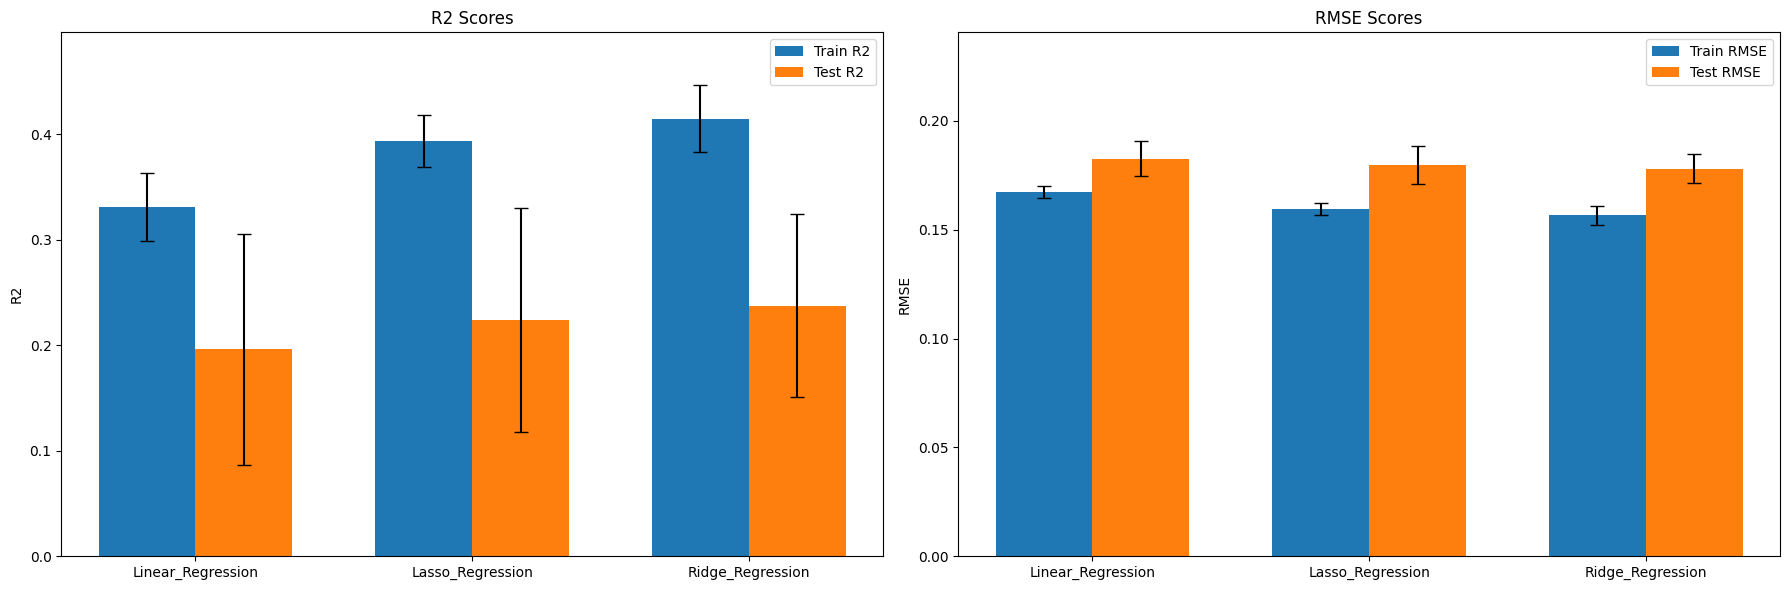

In [153]:
regression_types = ['Linear_Regression', 'Lasso_Regression', 'Ridge_Regression']
average_test_r2 = summary['Average_Test_R2']
test_r2_std = summary['Test_R2_STD']
average_test_rmse = summary['Average_Test_RMSE']
test_rmse_std = summary['Test_RMSE_STD']
average_train_r2 = summary['Average_Train_R2']
train_r2_std = summary['Train_R2_STD']
average_train_rmse = summary['Average_Train_RMSE']
train_rmse_std = summary['Train_RMSE_STD']

# Define the common range for R2 and RMSE
r2_range = (0, max(max(average_test_r2 + test_r2_std), max(average_train_r2 + train_r2_std)) + 0.05)
rmse_range = (0, max(max(average_test_rmse + test_rmse_std), max(average_train_rmse + train_rmse_std)) + 0.05)

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

bar_width = 0.35  # Narrower bars
index = np.arange(len(regression_types))  # Label locations

# Average Test and Train R2
axes[0].bar(index, average_train_r2, bar_width, yerr=train_r2_std, capsize=5, label='Train R2')
axes[0].bar(index + bar_width, average_test_r2, bar_width, yerr=test_r2_std, capsize=5, label='Test R2')
axes[0].set_title('R2 Scores')
axes[0].set_ylabel('R2')
axes[0].set_ylim(r2_range)
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(regression_types)
axes[0].legend()

# Average Test and Train RMSE
axes[1].bar(index, average_train_rmse, bar_width, yerr=train_rmse_std, capsize=5, label='Train RMSE')
axes[1].bar(index + bar_width, average_test_rmse, bar_width, yerr=test_rmse_std, capsize=5, label='Test RMSE')
axes[1].set_title('RMSE Scores')
axes[1].set_ylabel('RMSE')
axes[1].set_ylim(rmse_range)
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(regression_types)
axes[1].legend()


# Adjust layout
plt.tight_layout()
plt.savefig("../output/LR_results")
# Show plot
plt.show()